# AirBnb NYC Price Prediction

### By - Rohan Dhadwal

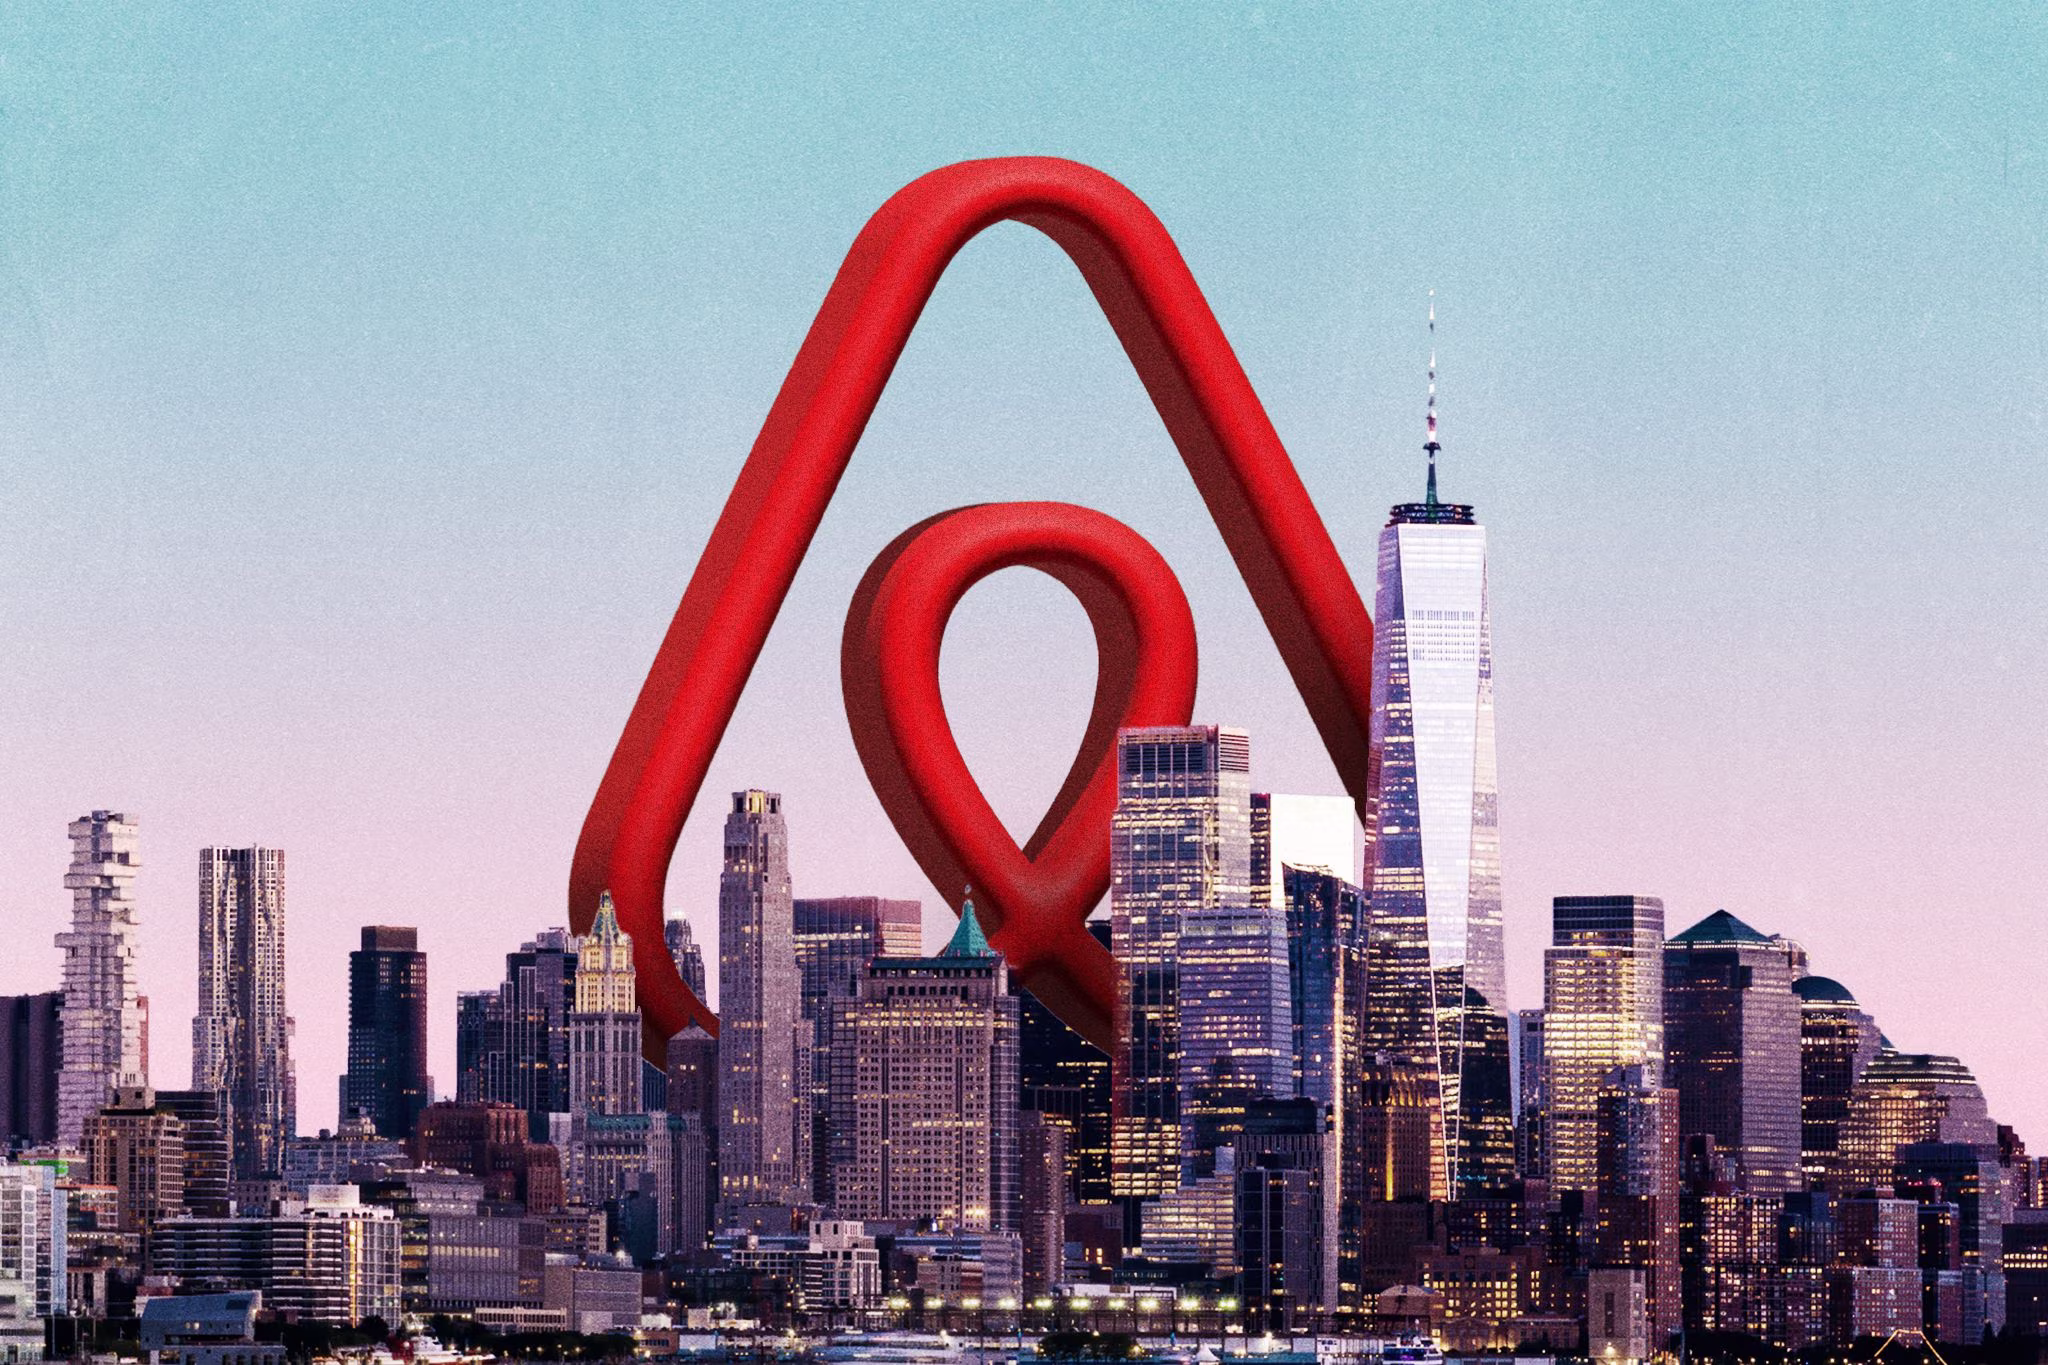

## Map Reference

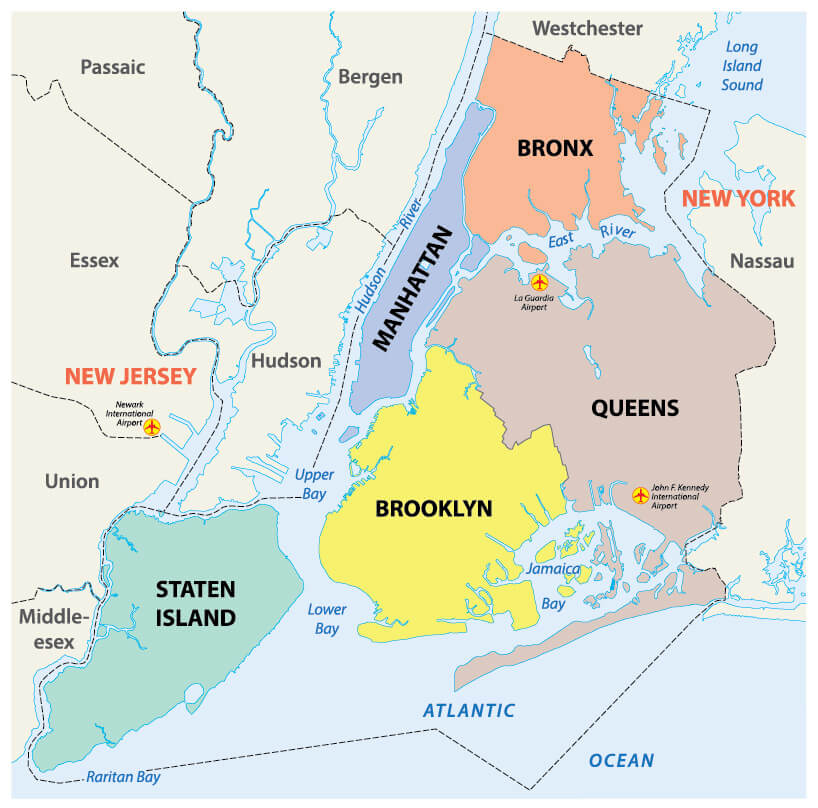

## 📌 Dataset Overview

### 📖 Context  
Since its inception in 2008, **Airbnb** has transformed the way people travel by offering unique, personalized accommodations beyond traditional hotels. This dataset provides insights into the **Airbnb listings in New York City (NYC) for the year 2019**, capturing key details about hosts, properties, pricing, and availability. By analyzing this dataset, we can explore patterns in **rental prices, geographical distribution, and factors influencing Airbnb listings.**

### 📂 Dataset Content  
The dataset contains essential details required to analyze **host activity, location-based trends, and pricing variations** across different boroughs of NYC. It includes information such as **property characteristics, host details, pricing, room types, review metrics, and availability**. This enables us to build predictive models for Airbnb pricing and extract valuable business insights.

### 🔍 Key Features  

| Column | Description |
|--------|------------|
| `id` | Unique identifier for each listing |
| `name` | Name of the listing |
| `host_id` | Unique identifier for the host |
| `host_name` | Name of the host |
| `neighbourhood_group` | Borough or main location of the listing (e.g., Manhattan, Brooklyn) |
| `neighbourhood` | Specific area within the borough |
| `latitude` | Geographic latitude coordinate of the listing |
| `longitude` | Geographic longitude coordinate of the listing |
| `room_type` | Type of space offered (e.g., Entire home, Private room, Shared room) |
| `price` | Listing price per night in USD |
| `minimum_nights` | Minimum required stay duration |
| `number_of_reviews` | Total number of reviews received |
| `last_review` | Date of the most recent review |
| `reviews_per_month` | Average number of reviews per month |
| `calculated_host_listings_count` | Total number of listings managed by the host |
| `availability_365` | Number of days the listing is available for booking within a year |

### 🎯 Use Cases  
This dataset can be used for various **data analysis and machine learning tasks**, including:  
✔️ **Price Prediction** – Identifying factors influencing rental prices and building predictive models  
✔️ **Geospatial Analysis** – Understanding the distribution of listings across NYC  
✔️ **Host Behavior Insights** – Examining host activity, availability, and review patterns  
✔️ **Customer Trends** – Analyzing demand patterns based on reviews and availability  

---

This dataset serves as the foundation for our **Airbnb Price Prediction Model**, where we aim to uncover insights and forecast listing prices based on key attributes. Let's dive into the data! 🚀  

## Importing Libraries

In [307]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV

## Loading the Dataset

In [309]:
df = pd.read_csv('./AB_NYC_2019.csv')

In [310]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [311]:
df.head(5)

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [312]:
df.shape

(48895, 16)

### Checking duplicate and null values

In [314]:
df.duplicated().sum()

0

In [315]:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

## Data Cleaning

### Removing unnecessary columns

To streamline our analysis and focus on meaningful insights, we can remove certain columns that do not significantly contribute to our model.  

1. **`host_id`** – This is a unique identifier for hosts, which does not provide any predictive power. Since it does not impact the price of a listing, it can be safely dropped. To identify the listing, we will retain the **`id`** column.
2. **`host_name` and `name`** – The listing name and host name are textual data that do not contain numerical or categorical information useful for price prediction. Additionally, these values may introduce unnecessary noise rather than contribute to meaningful analysis.  
3. **`last_review`** – While review counts may be relevant, the exact date of the last review is unlikely to impact pricing patterns significantly. 

Thus, we remove these columns to focus on the most relevant factors influencing Airbnb prices.  

In [319]:
df = df.drop(columns=['host_id', 'name', 'host_name', 'last_review'])

df.columns

Index(['id', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [320]:
df.shape

(48895, 12)

### Handling missing values

In [322]:
df.isna().sum()

id                                    0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [323]:
df['reviews_per_month'].head(10)

0    0.21
1    0.38
2     NaN
3    4.64
4    0.10
5    0.59
6    0.40
7    3.47
8    0.99
9    1.33
Name: reviews_per_month, dtype: float64

As we can see, the column **`reviews per month`** contains `NaN` values. This likely means that the listing has never been reviewed. Hence, I will replace it with 0.

In [325]:
# Replacing NaN with 0 for reviews_per_month column
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

df.isna().sum()

id                                0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

### Dropping null values as a safety measure

In [327]:
df=df.dropna()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   neighbourhood_group             48895 non-null  object 
 2   neighbourhood                   48895 non-null  object 
 3   latitude                        48895 non-null  float64
 4   longitude                       48895 non-null  float64
 5   room_type                       48895 non-null  object 
 6   price                           48895 non-null  int64  
 7   minimum_nights                  48895 non-null  int64  
 8   number_of_reviews               48895 non-null  int64  
 9   reviews_per_month               48895 non-null  float64
 10  calculated_host_listings_count  48895 non-null  int64  
 11  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(6), object(

## Exploratory Data Analysis

### Analyzing numerical data

In [330]:
df.describe()

id      latitude     longitude         price  minimum_nights  \
count  4.889500e+04  48895.000000  48895.000000  48895.000000    48895.000000   
mean   1.901714e+07     40.728949    -73.952170    152.720687        7.029962   
std    1.098311e+07      0.054530      0.046157    240.154170       20.510550   
min    2.539000e+03     40.499790    -74.244420      0.000000        1.000000   
25%    9.471945e+06     40.690100    -73.983070     69.000000        1.000000   
50%    1.967728e+07     40.723070    -73.955680    106.000000        3.000000   
75%    2.915218e+07     40.763115    -73.936275    175.000000        5.000000   
max    3.648724e+07     40.913060    -73.712990  10000.000000     1250.000000   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
count       48895.000000       48895.000000                    48895.000000   
mean           23.274466           1.090910                        7.143982   
std            44.550582           1.597283                       32.952519   
min             0.000000           0.000000                        1.000000   
25%             1.000000           0.040000                        1.000000   
50%             5.000000           0.370000                        1.000000   
75%            24.000000           1.580000                        2.000000   
max           629.000000          58.500000                      327.000000   

       availability_365  
count      48895.000000  
mean         112.781327  
std          131.622289  
min            0.000000  
25%            0.000000  
50%           45.000000  
75%          227.000000  
max          365.000000

- **Average Price:**  
 The average nightly price is **\$152.72**, but the **maximum price** reaches an extreme of **$10,000**, suggesting potential **outliers**

- **Minimum Nights:**  
  The **median minimum nights** required is **3**, but the **maximum value** of **1,250** indicates some **unusual entries** likely requiring further investigation.  

- **Availability:**  
  The **average availability** is around **113 days per year**, with some listings available **year-round (365 days)**.  

These statistics highlight the **variability** in pricing, availability, and booking policies across listings.


### Correlation Analysis

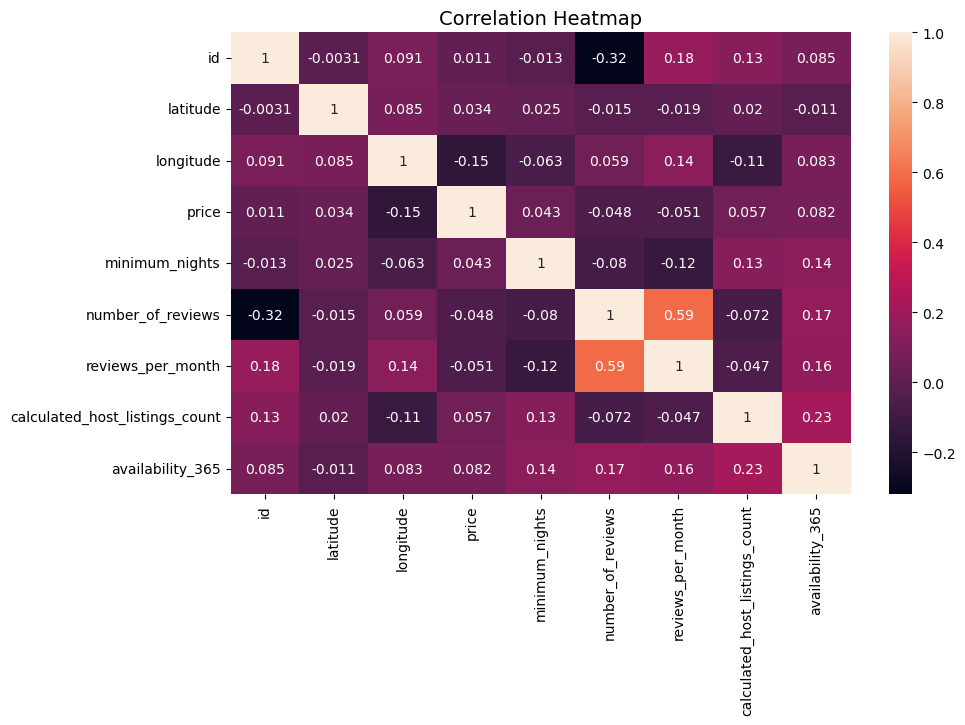

In [333]:
# Selecting only numerical columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

corr_matrix = numeric_df.corr(method='pearson')

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Heatmap", fontsize=14)

plt.show()

- **Strong Positive Correlation**: `number_of_reviews` and `reviews_per_month` (0.59), indicating that listings with more reviews receive them more frequently. This makes sense.

- **Weak Correlations**: `price` is weakly correlated with all factors. Also, `availability_365` has a slight positive correlation with `calculated_host_listings_count` (0.23).

- **Negative Correlation**: `price` and `longitude` (-0.15) suggests that there is a slight tendency for prices to decrease as longitude increases, which could reflect geographical trends in NYC, such as higher prices in areas closer to Manhattan (lower longitude values).

Overall, most relationships are weak, indicating that key factors such as price and availability are largely independent. This also suggests that no other feature needs to be removed from the dataset.

### Georgraphical & Categorical Variable Analysis

#### Analyzing Neighbourhood Group

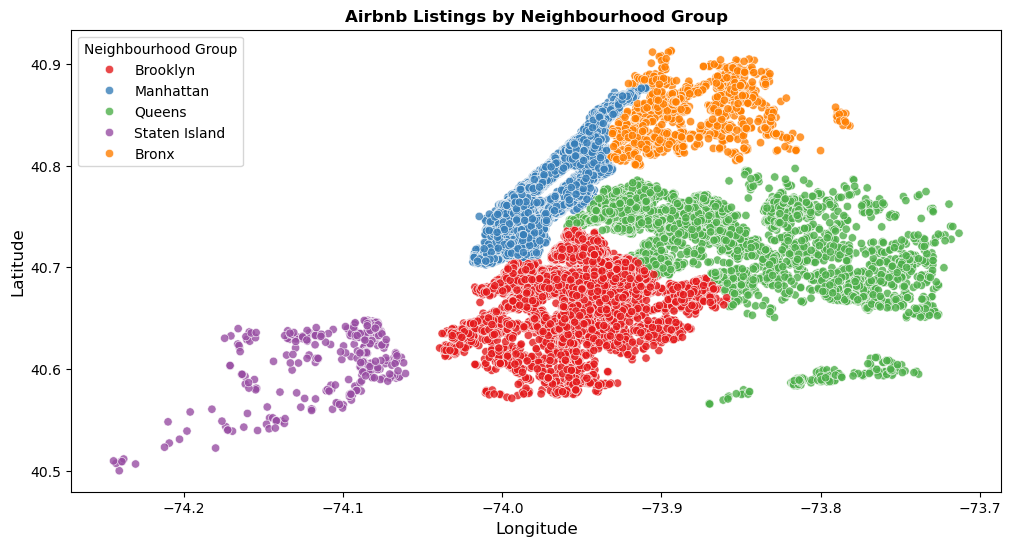

In [337]:
plt.style.use("default")
plt.figure(figsize=(12, 6))

sns.scatterplot(
    data=df, x="longitude", y="latitude", hue="neighbourhood_group", palette="Set1", alpha=0.8)

plt.title("Airbnb Listings by Neighbourhood Group", fontsize=12, fontweight="bold")
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)
plt.legend(title="Neighbourhood Group")
plt.show()

The scatterplot shows the geographical distribution of Airbnb listings across NYC's neighborhood groups. Manhattan (blue) and Brooklyn (red) have the densest concentration of listings, while Staten Island (purple) has the sparsest. The distribution aligns with NYC's population density and tourism hotspots, with Manhattan being the most central and popular area.

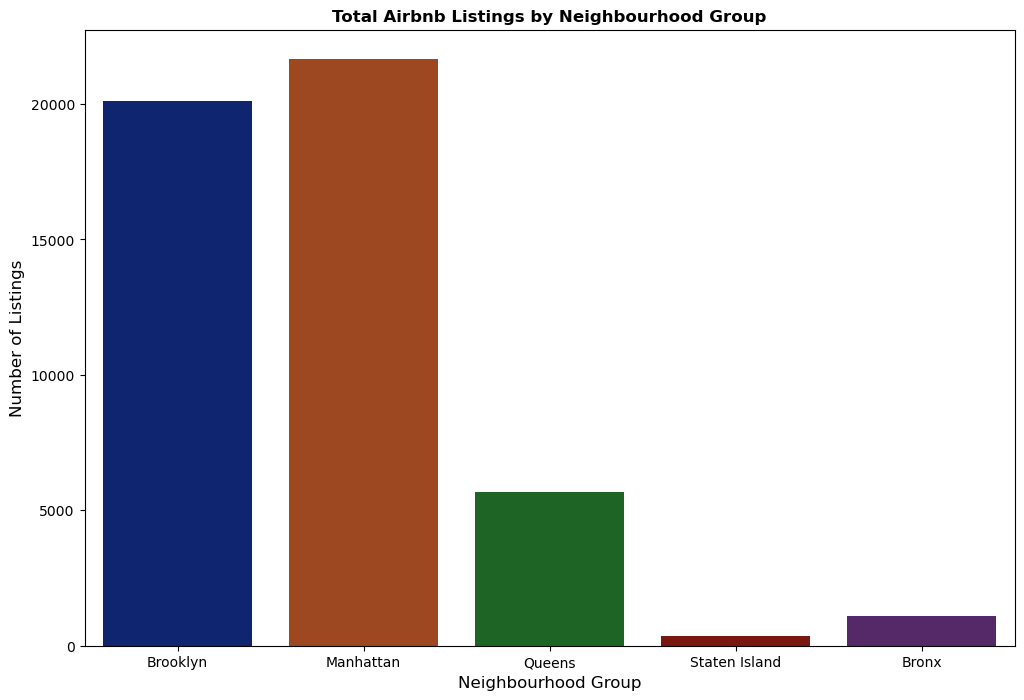

In [339]:
plt.figure(figsize=(12, 8))

ax = sns.countplot(data=df, x="neighbourhood_group", palette="dark",hue="neighbourhood_group")

plt.title("Total Airbnb Listings by Neighbourhood Group", fontsize=12, fontweight="bold")
plt.xlabel("Neighbourhood Group", fontsize=12)
plt.ylabel("Number of Listings", fontsize=12)

plt.show()

Manhattan and Brooklyn dominate Airbnb listings in NYC, with over 20,000 each, while Staten Island has the fewest at just 373.

#### Analyzing Room Type

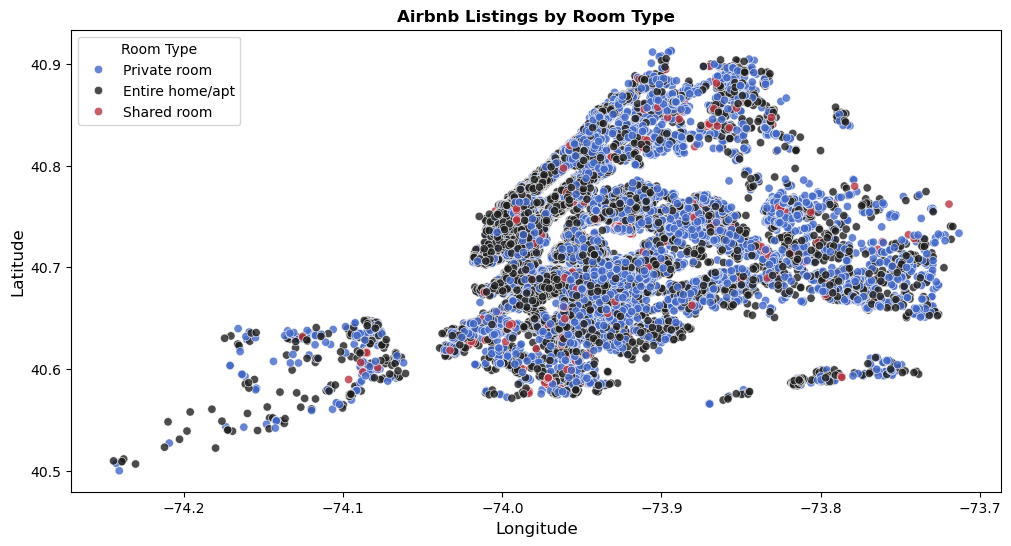

In [342]:
plt.figure(figsize=(12, 6))

sns.scatterplot(
    data=df, x="longitude", y="latitude", hue="room_type", palette="icefire", alpha=0.8)

plt.title("Airbnb Listings by Room Type", fontsize=12, fontweight="bold")
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)
plt.legend(title="Room Type")
plt.show()

Entire homes/apartments (black) and private rooms (blue) dominate across all areas, with private rooms being more prevalent. Shared rooms (red) are sparse and scattered, indicating they are less common. The densest clusters of listings are in Manhattan and Brooklyn, reflecting their popularity among hosts and travelers.

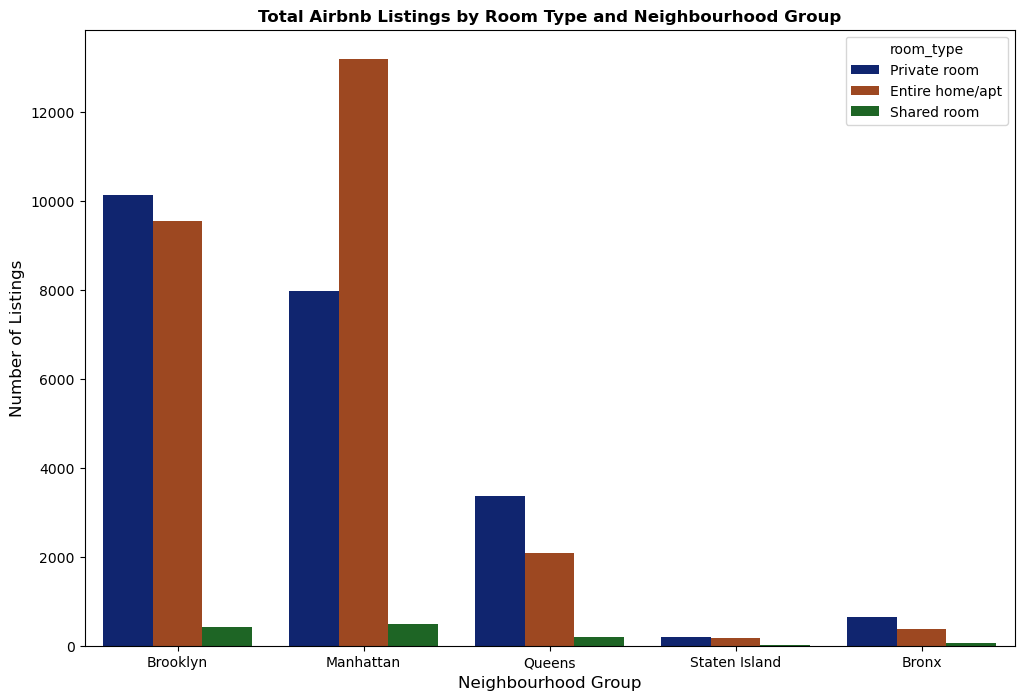

In [344]:
plt.figure(figsize=(12, 8))

ax = sns.countplot(data=df, x="neighbourhood_group", palette="dark",hue="room_type")

plt.title("Total Airbnb Listings by Room Type and Neighbourhood Group", fontsize=12, fontweight="bold")
plt.xlabel("Neighbourhood Group", fontsize=12)
plt.ylabel("Number of Listings", fontsize=12)

plt.show()

The count plot shows that Manhattan and Brooklyn dominate Airbnb listings, with "Entire home/apt" being the most common room type in both boroughs. Private rooms are also significant, especially in Brooklyn, while shared rooms are rare across all neighborhoods. Staten Island and the Bronx have the fewest listings overall in all 3 room types

### Numerical Variable Analysis

#### Understanding Price

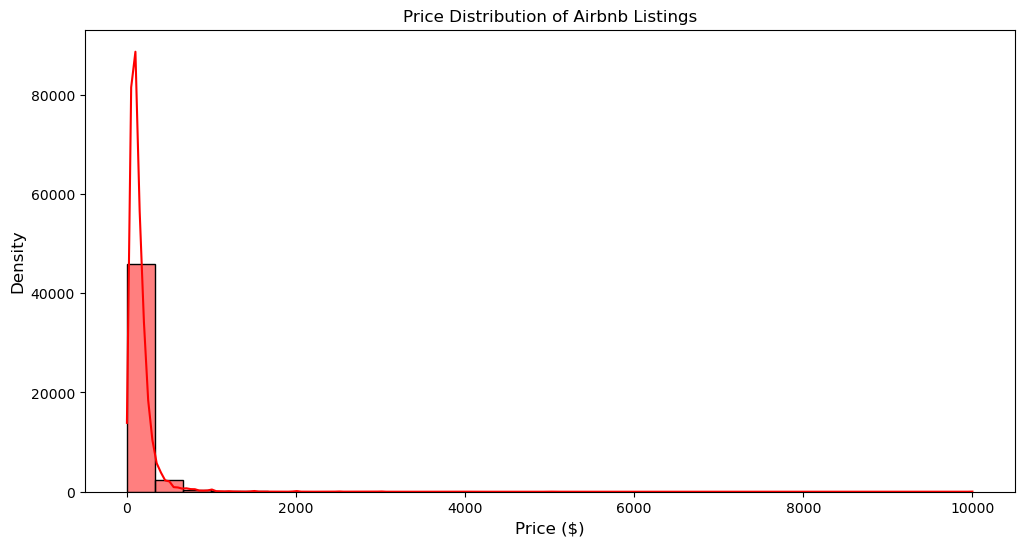

In [348]:
plt.figure(figsize=(12, 6))

sns.histplot(data=df, x='price', bins=30, kde=True, color='red')

plt.title('Price Distribution of Airbnb Listings', fontsize=12)
plt.xlabel('Price ($)', fontsize=12)
plt.ylabel('Density', fontsize=12)

plt.show()

The price distribution of Airbnb listings is highly skewed to the right, with most listings concentrated at lower price ranges (under \\$500). A few extreme outliers exist, with prices exceeding \\$6,000. This suggests that while most listings might be affordable, a small number of luxury or premium properties significantly inflate the price range.

Hence, we can use a logarithmic scale that will help us to visualize the spread of prices effectively.

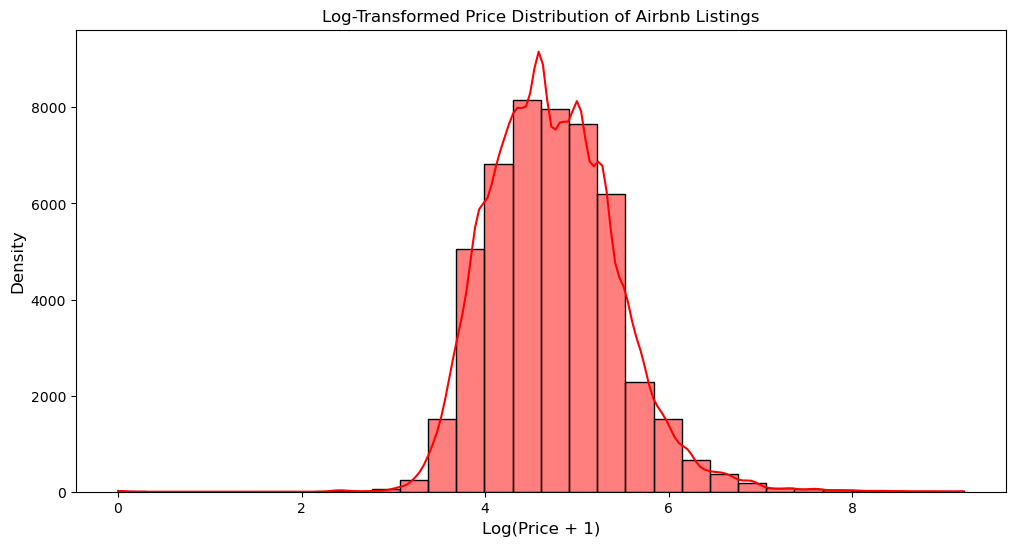

In [350]:
plt.figure(figsize=(12, 6))

sns.histplot(data=df, x=np.log1p(df['price']), bins=30, kde=True, color='red')


plt.title('Log-Transformed Price Distribution of Airbnb Listings', fontsize=12)
plt.xlabel('Log(Price + 1)', fontsize=12)
plt.ylabel('Density', fontsize=12)


plt.show()

The log transformation of price reveals a more symmetrical and bell-shaped distribution, making it easier to interpret patterns in the data. 
Since `log(0)` is undefined, adding 1 ensures that listings with a price of $0 (if any) are handled correctly.
The transformed scale allows for better comparisons, as differences between lower prices will be more noticeable.

In [352]:
df['log_price']=np.log1p(df["price"])

### Neighbourhood Group vs Log of Price for Room Types

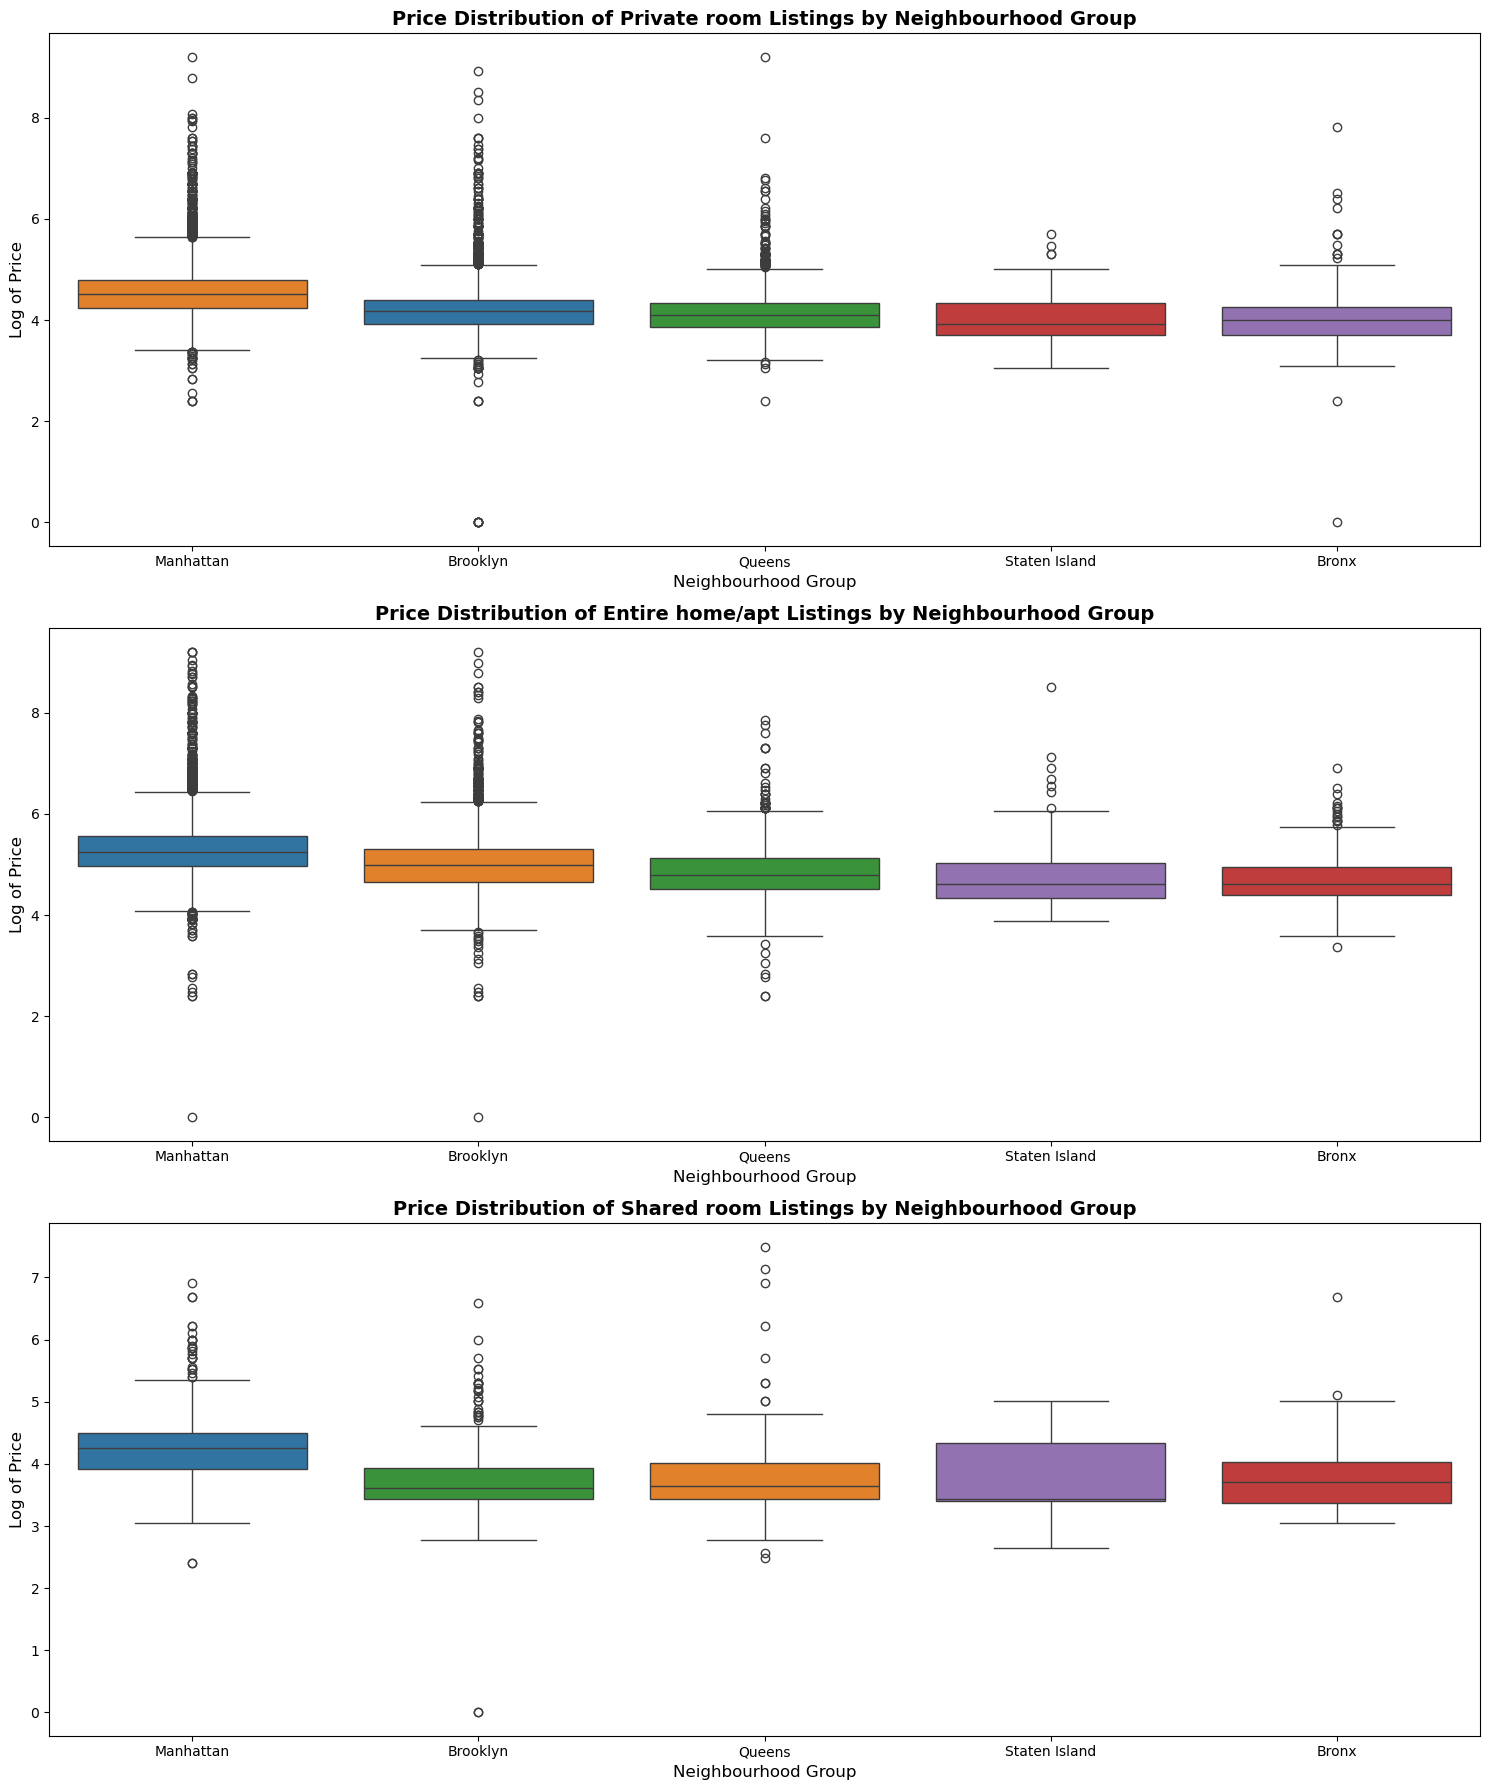

In [354]:
plt.figure(figsize=(15, 18))

room_types = df['room_type'].unique()
neighbourhood_order = ['Manhattan', 'Brooklyn', 'Queens', 'Staten Island', 'Bronx']

# Create a violin plot for each room type
for i, room_type in enumerate(room_types):
    plt.subplot(len(room_types), 1, i + 1)  # Create a subplot for each room type
    sns.boxplot(data=df[df['room_type'] == room_type], 
                   x='neighbourhood_group', 
                   y='log_price', 
                   hue='neighbourhood_group', order=neighbourhood_order)
    
    plt.title(f'Price Distribution of {room_type} Listings by Neighbourhood Group', fontsize=14, fontweight='bold')
    plt.xlabel('Neighbourhood Group', fontsize=12)
    plt.ylabel('Log of Price', fontsize=12)

plt.tight_layout()
plt.show()


**Private Rooms**  
- Manhattan exhibits the highest median prices, reflecting its premium location and demand.  
- Brooklyn follows with slightly lower prices, while Queens, Staten Island, and the Bronx offer more affordable options.  
- The presence of outliers in all boroughs indicates some luxury private room listings.  

**Entire Homes/Apartments**  
- Manhattan leads with the highest median prices, emphasizing its desirability for full-property stays.  
- Brooklyn has a significant range of prices but remains more affordable than Manhattan.  
- Staten Island and the Bronx have the lowest median prices, catering to budget-conscious travelers, though outliers exist across all boroughs.  

**Shared Rooms**  
- Prices are generally lower across all boroughs, with Manhattan still having the highest median.  
- Brooklyn and Queens offer moderately priced shared spaces, while Staten Island and the Bronx remain the most affordable.  
- The limited price range and fewer outliers suggest shared rooms are less popular and cater primarily to budget travelers.  


### Number of Reviews vs Price for Neighbourhood Groups

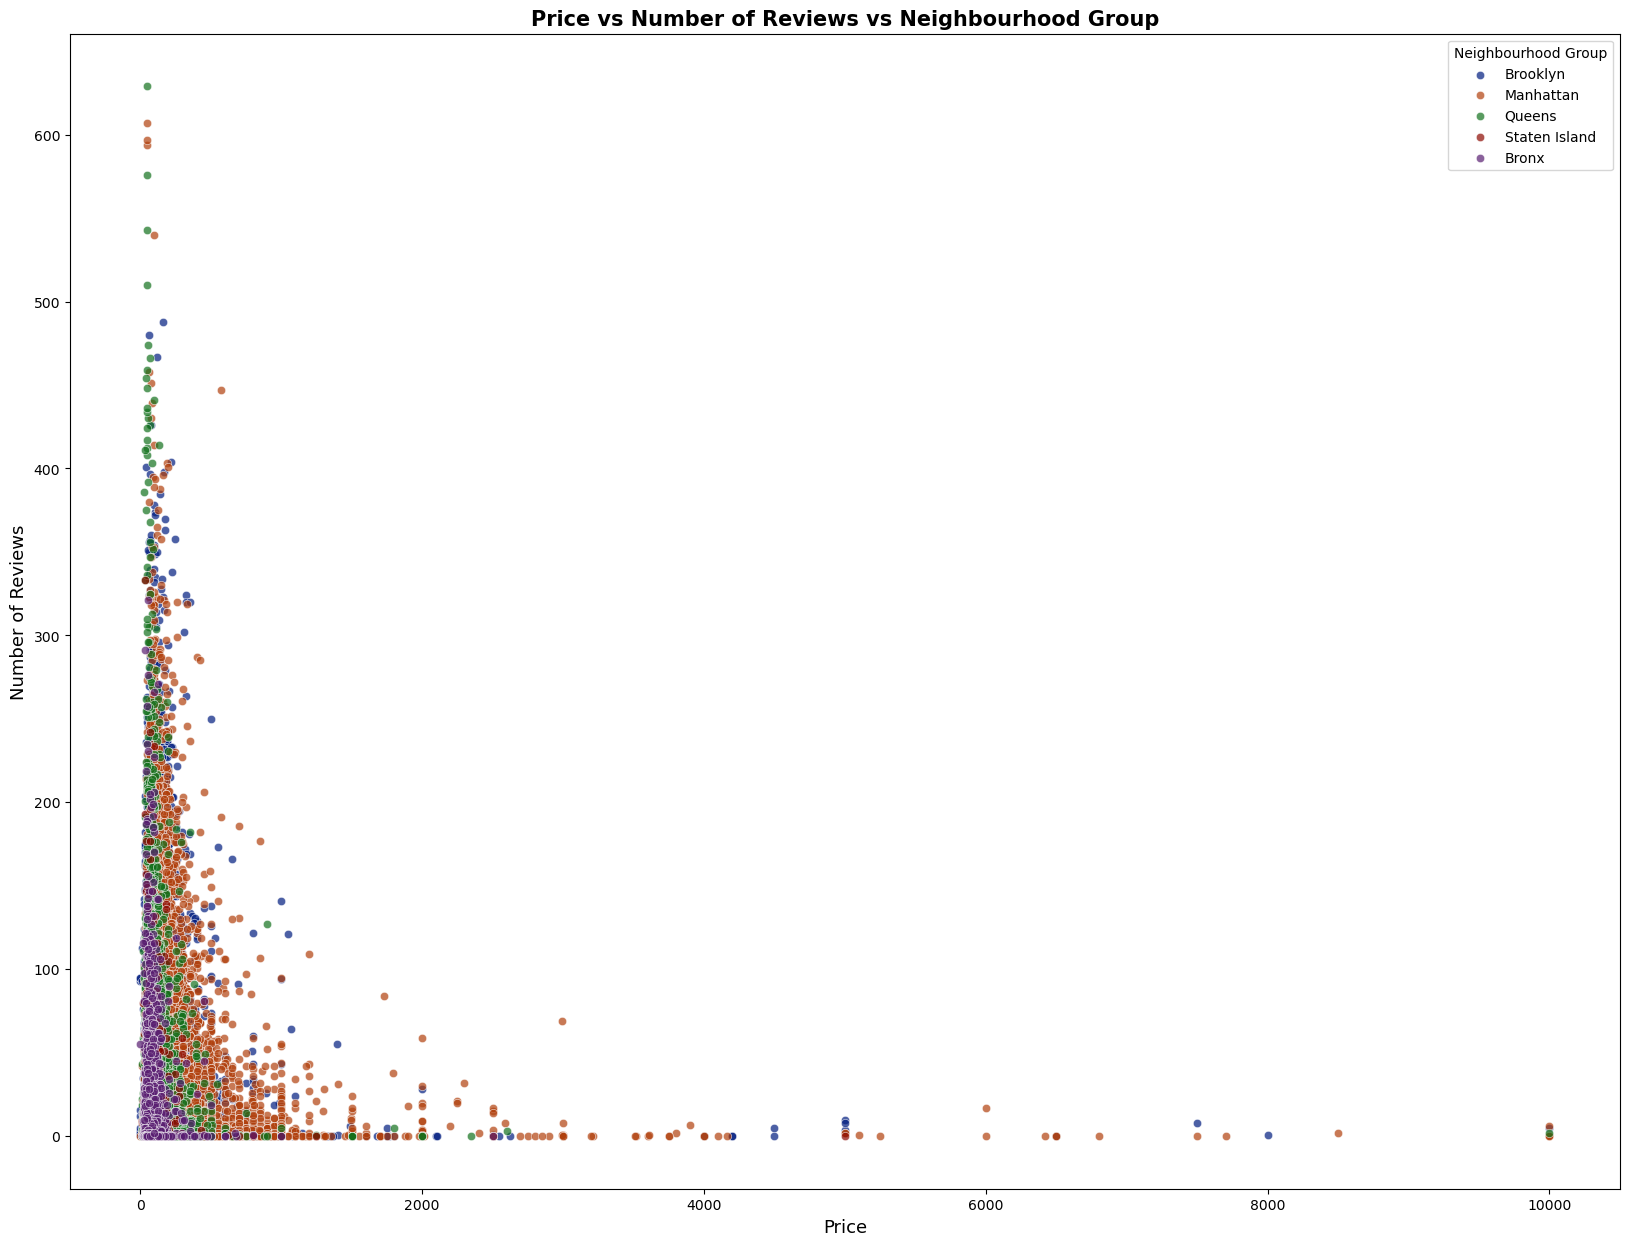

In [357]:
plt.figure(figsize=(20, 15))
sns.set_palette("dark")

for neighborhood in df['neighbourhood_group'].unique():
    sns.scatterplot(x='price', y='number_of_reviews', 
                    data=df[df['neighbourhood_group'] == neighborhood],
                    label=neighborhood, alpha=0.7)

plt.xlabel("Price", size=13)
plt.ylabel("Number of Reviews", size=13)
plt.title("Price vs Number of Reviews vs Neighbourhood Group", size=15, weight='bold')
plt.legend(title='Neighbourhood Group')
plt.show()


The scatter plot shows that listings with lower prices tend to have a higher number of reviews, indicating an inverse relationship between price and popularity. As price increases, the number of reviews decreases significantly, suggesting that expensive listings cater to a niche audience. The weak negative correlation highlights that affordability is a key factor in driving customer engagement across all neighborhood groups.

### Availability vs Neighbourhood Groups for Room Types

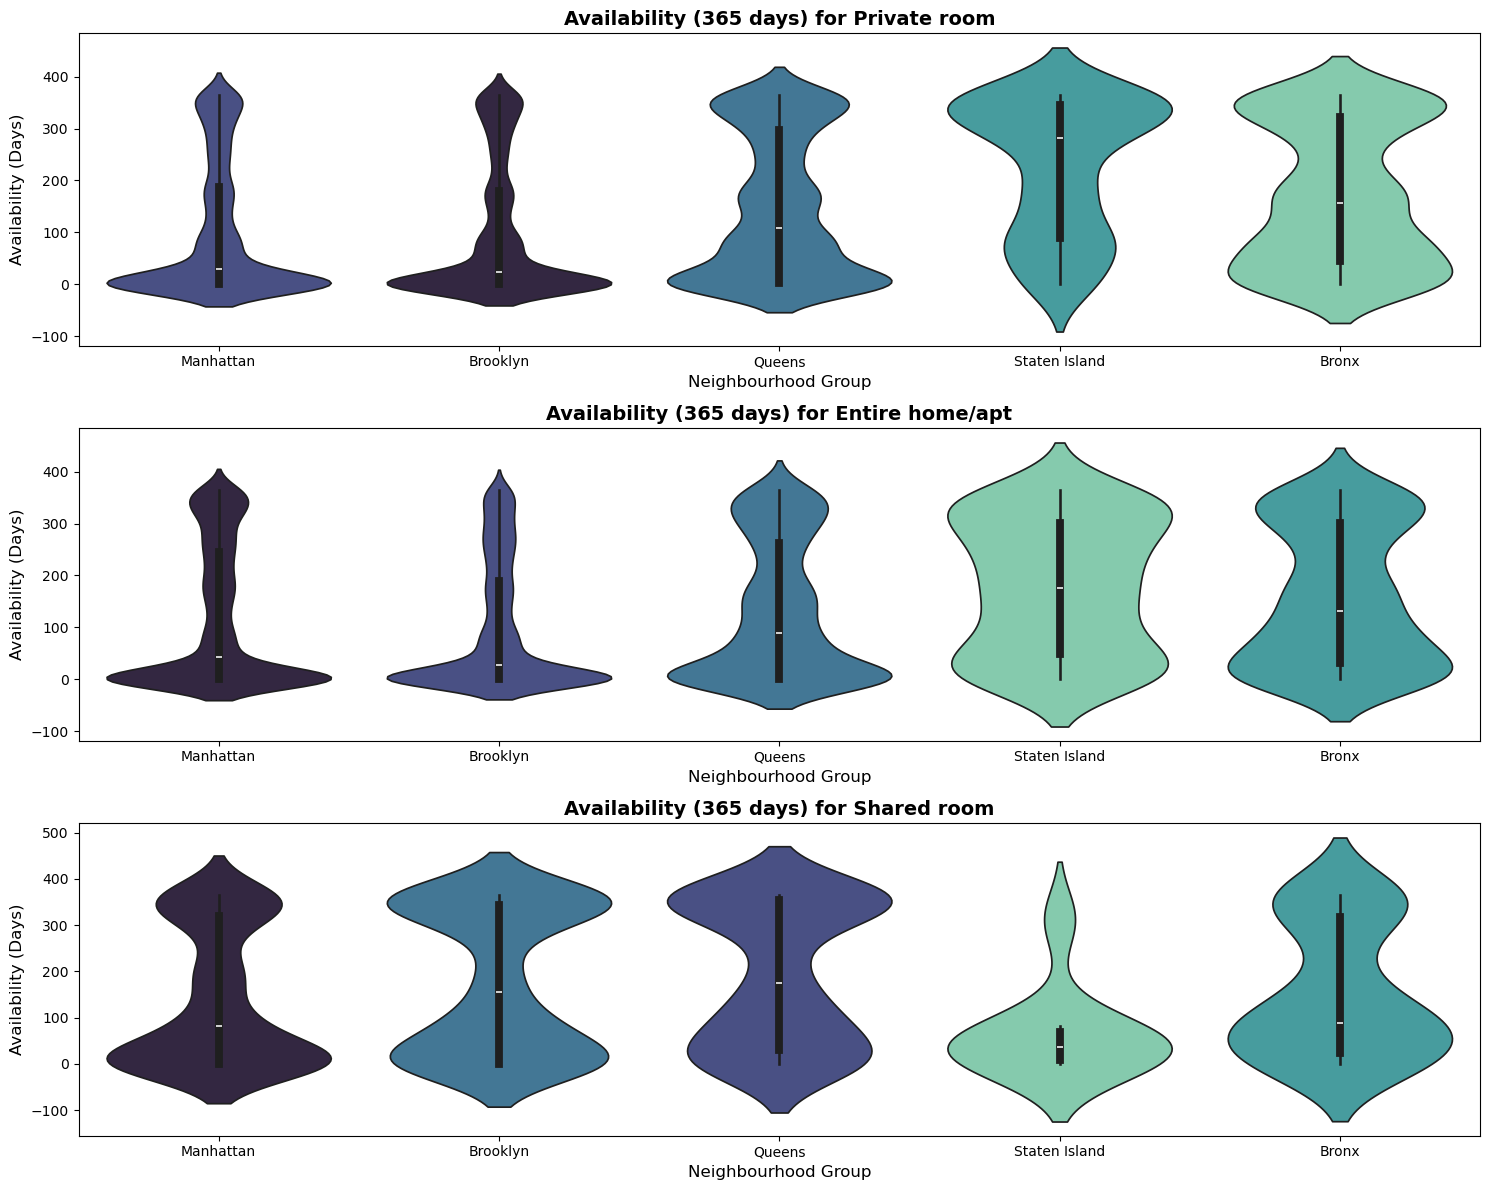

In [360]:
plt.figure(figsize=(15, 12))

room_types = df['room_type'].unique()
neighbourhood_order = ['Manhattan', 'Brooklyn', 'Queens', 'Staten Island', 'Bronx']

for i, room in enumerate(room_types):
    plt.subplot(3, 1, i + 1)
    sns.violinplot(x='neighbourhood_group', y='availability_365', data=df[df['room_type'] == room], palette='mako',
                   hue='neighbourhood_group', order=neighbourhood_order)
    plt.title(f'Availability (365 days) for {room}', fontsize=14, weight='bold')
    plt.xlabel('Neighbourhood Group', fontsize=12)
    plt.ylabel('Availability (Days)', fontsize=12)

plt.tight_layout()
plt.show()


For **private rooms**, the violin plot shows that Manhattan and Brooklyn have a similar distribution, with the median availability around 0-100 days and a high density of listings available for fewer days. Queens, Staten Island, and the Bronx exhibit wider spreads, with Staten Island having a significant proportion of listings available year-round (365 days).

For **entire homes/apartments**, Manhattan and Brooklyn still have a concentration of listings with lower availability (0-100 days), but Staten Island shows higher densities for year-round availability (365 days). This suggests that entire homes are more likely to be consistently available, especially in less central boroughs like Staten Island.

For **shared rooms**, the distribution is narrower overall, with Manhattan showing the highest density around 0-100 days of availability. Brooklyn has a median between 100-200 with almost evenly distributed lower availability listings and higher availability listings. Queens and the Bronx have slightly broader spreads but still show limited year-round availability. Staten Island exhibits an unusual pattern with a small number of listings available for 365 days, reflecting its limited supply of shared rooms compared to other room types.

## Data Preprocessing

### Outlier Detection

In [364]:
df = df.drop(columns=["log_price"])

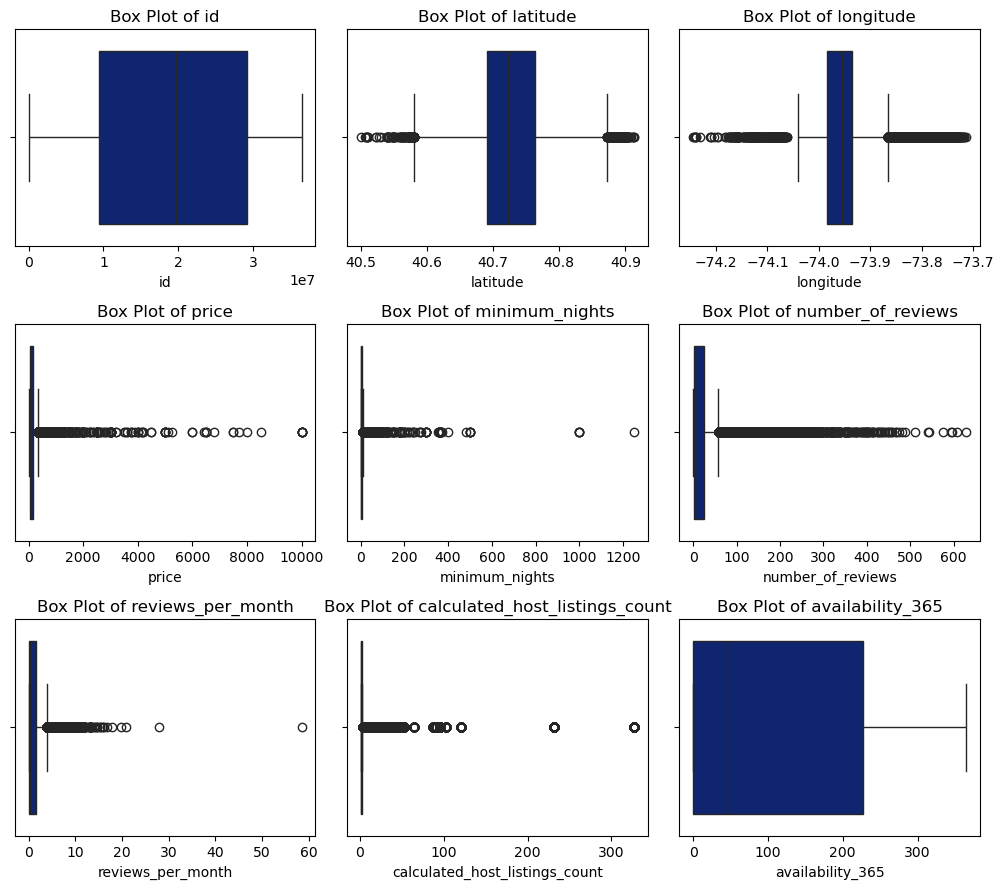

In [365]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

n_cols = 3
n_rows = np.ceil(len(num_cols) / n_cols)

plt.figure(figsize=(10, 3 * n_rows))
for i, col in enumerate(num_cols):
    plt.subplot(int(n_rows), n_cols, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

The residual plots reveal several patterns and potential outliers in the data. 

- For `price` and `minimum_nights`, there are extreme values far beyond the whiskers, indicating unusually high prices and long minimum stays that may distort analysis.
- Variables like `number_of_reviews` and `reviews_per_month` also show a concentration of data near the lower range, with a few extreme values skewing the distribution.
- Similarly, `calculated_host_listings_count` has many outliers, likely representing hosts with an unusually large number of listings. These outliers highlight the need for preprocessing to ensure meaningful statistical analysis and modeling.


### Outlier Removal

In [368]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

def calculate_outlier_thresholds(dataframe, column_name, lower_quantile=0.05, upper_quantile=0.95):
    q1 = dataframe[column_name].quantile(lower_quantile)
    q3 = dataframe[column_name].quantile(upper_quantile)
    iqr = q3 - q1
    upper_limit = q3 + 1.5 * iqr
    lower_limit = q1 - 1.5 * iqr
    return lower_limit, upper_limit

def has_outliers(dataframe, column_name):
    lower_limit, upper_limit = calculate_outlier_thresholds(dataframe, column_name)
    return (dataframe[column_name] > upper_limit).any() or (dataframe[column_name] < lower_limit).any()

def cap_outliers(dataframe, column_name):
    dataframe[column_name] = dataframe[column_name].astype(float)
    lower_limit, upper_limit = calculate_outlier_thresholds(dataframe, column_name)
    dataframe.loc[dataframe[column_name] < lower_limit, column_name] = lower_limit
    dataframe.loc[dataframe[column_name] > upper_limit, column_name] = upper_limit

for column in num_cols:
    if has_outliers(df, column):
        cap_outliers(df, column)

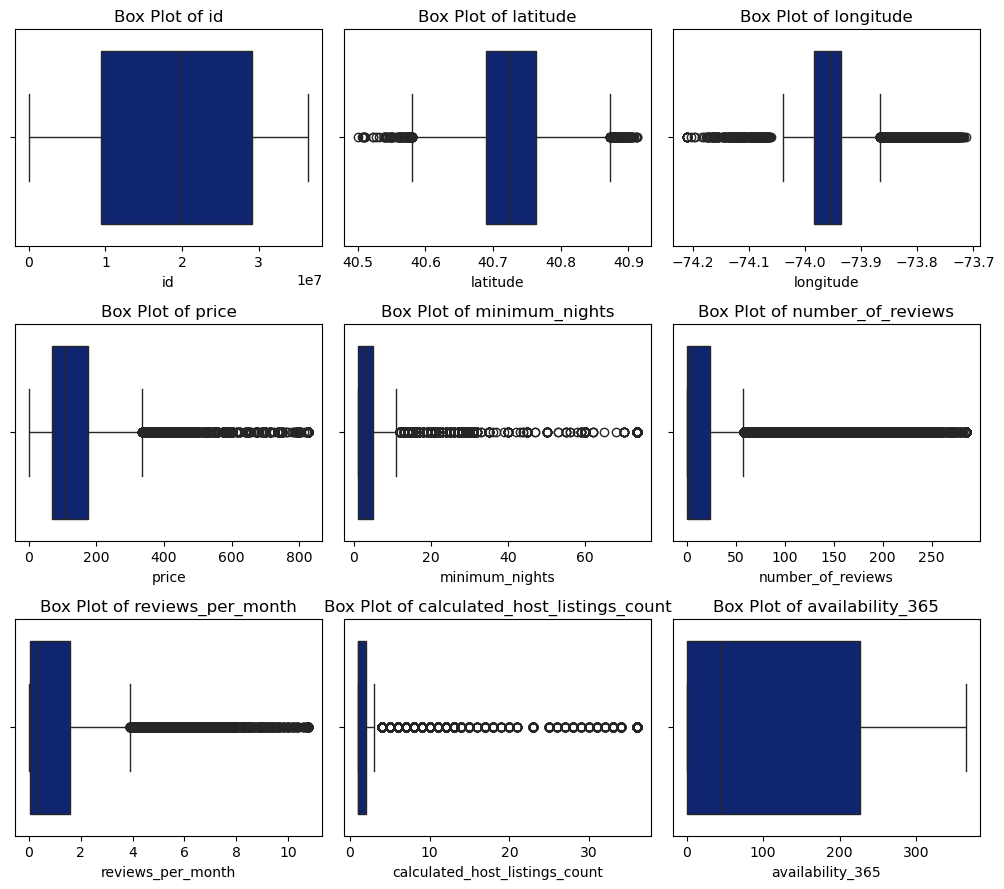

In [369]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

n_cols = 3
n_rows = np.ceil(len(num_cols) / n_cols)

plt.figure(figsize=(10, 3 * n_rows))
for i, col in enumerate(num_cols):
    plt.subplot(int(n_rows), n_cols, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()


The box plots after outlier removal show a much cleaner distribution for most variables, with extreme values significantly reduced. 

- For `price`, `minimum_nights`, and `number_of_reviews`, the data is now more concentrated within the whiskers, making it easier to analyze trends without distortion from outliers.
- Similarly, `calculated_host_listings_count` and `reviews_per_month` now have fewer extreme values, improving interpretability.

In [371]:
# Checking if any other outliers are to be removed
for col in num_cols:
    print(col, has_outliers(df, col))

id False
latitude False
longitude False
price False
minimum_nights False
number_of_reviews False
reviews_per_month False
calculated_host_listings_count False
availability_365 False


### Feature Engineering

In [373]:
# Total cost for the minimum nights of stay
df['total_cost'] = df['price'] * df['minimum_nights']

# Estimate of how long the property has been listed in months.
df['listed_months'] = df['number_of_reviews'] / df['reviews_per_month']
df['listed_months'] = df['listed_months'].fillna(0)

# Ratio of how often the property is available in a year.
df['availability_ratio'] = df['availability_365'] / 365

# Daily average number of reviews received by the host.
df['average_reviews_per_day'] = df['reviews_per_month'] / 30
df['average_reviews_per_day'] = df['average_reviews_per_day'].fillna(0)

# Estimated potential annual income from the property
df['annual_income'] = df['price'] * df['availability_365']

# Occupancy rate, indicating how many days the property is booked in a year.
df['occupancy_rate'] = 365 - df['availability_365']

In [374]:
df.head()

id neighbourhood_group neighbourhood  latitude  longitude  \
0  2539            Brooklyn    Kensington  40.64749  -73.97237   
1  2595           Manhattan       Midtown  40.75362  -73.98377   
2  3647           Manhattan        Harlem  40.80902  -73.94190   
3  3831            Brooklyn  Clinton Hill  40.68514  -73.95976   
4  5022           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews  \
0     Private room  149.0             1.0                9.0   
1  Entire home/apt  225.0             1.0               45.0   
2     Private room  150.0             3.0                0.0   
3  Entire home/apt   89.0             1.0              270.0   
4  Entire home/apt   80.0            10.0                9.0   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               0.21                             6.0               365   
1               0.38                             2.0               355   
2               0.00                             1.0               365   
3               4.64                             1.0               194   
4               0.10                             1.0                 0   

   total_cost  listed_months  availability_ratio  average_reviews_per_day  \
0       149.0      42.857143            1.000000                 0.007000   
1       225.0     118.421053            0.972603                 0.012667   
2       450.0       0.000000            1.000000                 0.000000   
3        89.0      58.189655            0.531507                 0.154667   
4       800.0      90.000000            0.000000                 0.003333   

   annual_income  occupancy_rate  
0        54385.0               0  
1        79875.0              10  
2        54750.0               0  
3        17266.0             171  
4            0.0             365

In [375]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   neighbourhood_group             48895 non-null  object 
 2   neighbourhood                   48895 non-null  object 
 3   latitude                        48895 non-null  float64
 4   longitude                       48895 non-null  float64
 5   room_type                       48895 non-null  object 
 6   price                           48895 non-null  float64
 7   minimum_nights                  48895 non-null  float64
 8   number_of_reviews               48895 non-null  float64
 9   reviews_per_month               48895 non-null  float64
 10  calculated_host_listings_count  48895 non-null  float64
 11  availability_365                48895 non-null  int64  
 12  total_cost                      

### Encoding

In [377]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    
   #Returns categorical, numeric, and cardinal variable names#
    
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtype == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtype != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtype == "O"]

    cat_cols += num_but_cat
    cat_cols = list(set(cat_cols) - set(cat_but_car))  # Exclude cardinal from categorical
    
    num_cols = [col for col in dataframe.columns if dataframe[col].dtype != "O" and col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}") 
    print(f"Variables: {dataframe.shape[1]}") 
    print(f'cat_cols: {len(cat_cols)}') 
    print(f'num_cols: {len(num_cols)}') 
    print(f'cat_but_car: {len(cat_but_car)}') 
    print(f'num_but_cat: {len(num_but_cat)}') 

    return cat_cols, num_cols, cat_but_car, num_but_cat

Cardinal variable names refer to categorical variables that have a large number of unique values, often making them unsuitable for standard categorical analysis. These variables can take on a range of values that are distinct but do not have a meaningful ordinal relationship (i.e., they don't represent ordered categories)

In [379]:
cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(df)

print("\nCategorical Columns:", cat_cols)
print("\nNumeric Columns:", num_cols)
print("\nCategorical but Cardinal Columns:", cat_but_car)
print("\nNumeric but Categorical Columns:", num_but_cat)

Observations: 48895
Variables: 18
cat_cols: 2
num_cols: 15
cat_but_car: 1
num_but_cat: 0

Categorical Columns: ['neighbourhood_group', 'room_type']

Numeric Columns: ['id', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'total_cost', 'listed_months', 'availability_ratio', 'average_reviews_per_day', 'annual_income', 'occupancy_rate']

Categorical but Cardinal Columns: ['neighbourhood']

Numeric but Categorical Columns: []


In [380]:
df = df.drop(columns=['neighbourhood'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   neighbourhood_group             48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  float64
 6   minimum_nights                  48895 non-null  float64
 7   number_of_reviews               48895 non-null  float64
 8   reviews_per_month               48895 non-null  float64
 9   calculated_host_listings_count  48895 non-null  float64
 10  availability_365                48895 non-null  int64  
 11  total_cost                      48895 non-null  float64
 12  listed_months                   

In [381]:
df.shape

(48895, 17)

In [382]:
print(df['neighbourhood_group'].unique())
print(df['room_type'].unique())

['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
['Private room' 'Entire home/apt' 'Shared room']


In [383]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    df_encoded = pd.get_dummies(dataframe[categorical_cols], drop_first=drop_first)
    df_encoded = df_encoded.astype(int)
    dataframe = pd.concat([dataframe.drop(categorical_cols, axis=1), df_encoded], axis=1)
    return dataframe

df = one_hot_encoder(df, cat_cols)
df.head()

id  latitude  longitude  price  minimum_nights  number_of_reviews  \
0  2539  40.64749  -73.97237  149.0             1.0                9.0   
1  2595  40.75362  -73.98377  225.0             1.0               45.0   
2  3647  40.80902  -73.94190  150.0             3.0                0.0   
3  3831  40.68514  -73.95976   89.0             1.0              270.0   
4  5022  40.79851  -73.94399   80.0            10.0                9.0   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               0.21                             6.0               365   
1               0.38                             2.0               355   
2               0.00                             1.0               365   
3               4.64                             1.0               194   
4               0.10                             1.0                 0   

   total_cost  ...  availability_ratio  average_reviews_per_day  \
0       149.0  ...            1.000000                 0.007000   
1       225.0  ...            0.972603                 0.012667   
2       450.0  ...            1.000000                 0.000000   
3        89.0  ...            0.531507                 0.154667   
4       800.0  ...            0.000000                 0.003333   

   annual_income  occupancy_rate  neighbourhood_group_Brooklyn  \
0        54385.0               0                             1   
1        79875.0              10                             0   
2        54750.0               0                             0   
3        17266.0             171                             1   
4            0.0             365                             0   

   neighbourhood_group_Manhattan  neighbourhood_group_Queens  \
0                              0                           0   
1                              1                           0   
2                              1                           0   
3                              0                           0   
4                              1                           0   

   neighbourhood_group_Staten Island  room_type_Private room  \
0                                  0                       1   
1                                  0                       0   
2                                  0                       1   
3                                  0                       0   
4                                  0                       0   

   room_type_Shared room  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  

[5 rows x 21 columns]

In [384]:
# Renaming columns
df.columns = df.columns.str.replace('[^A-Za-z0-9/_]+', '')
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.lower()

In [385]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 48895 non-null  int64  
 1   latitude                           48895 non-null  float64
 2   longitude                          48895 non-null  float64
 3   price                              48895 non-null  float64
 4   minimum_nights                     48895 non-null  float64
 5   number_of_reviews                  48895 non-null  float64
 6   reviews_per_month                  48895 non-null  float64
 7   calculated_host_listings_count     48895 non-null  float64
 8   availability_365                   48895 non-null  int64  
 9   total_cost                         48895 non-null  float64
 10  listed_months                      48895 non-null  float64
 11  availability_ratio                 48895 non-null  flo

### Train-Test Split

In [387]:
X = df.drop(["price"], axis=1)
Y = df["price"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (39116, 20)
X_test shape: (9779, 20)
Y_train shape: (39116,)
Y_test shape: (9779,)


### Scaling

We should use the RobustScaler here because our dataset likely contains outliers, and this scaler is specifically designed to be robust to them.

In [390]:
scaler = RobustScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

print("Median of X_train before scaling:\n", X_train.median())
print("\nMedian of X_train after scaling:\n", pd.DataFrame(X_train_s).median())

Median of X_train before scaling:
 id                                   1.973430e+07
latitude                             4.072292e+01
longitude                           -7.395575e+01
minimum_nights                       2.000000e+00
number_of_reviews                    5.000000e+00
reviews_per_month                    3.700000e-01
calculated_host_listings_count       1.000000e+00
availability_365                     4.400000e+01
total_cost                           3.000000e+02
listed_months                        1.463415e+01
availability_ratio                   1.205479e-01
average_reviews_per_day              1.233333e-02
annual_income                        4.205000e+03
occupancy_rate                       3.210000e+02
neighbourhood_group_brooklyn         0.000000e+00
neighbourhood_group_manhattan        0.000000e+00
neighbourhood_group_queens           0.000000e+00
neighbourhood_group_staten_island    0.000000e+00
room_type_private_room               0.000000e+00
room_type_share

## Model Building

In [392]:
models = {
    "Lasso": Lasso(),
    "XGBoost": XGBRegressor(),
    "Random Forest": RandomForestRegressor(),
    "KNN": KNeighborsRegressor()
}

In [393]:
results = {}

for name, model in models.items():
    model.fit(X_train_s, Y_train)
    Y_pred = model.predict(X_test_s)
    r2 = r2_score(Y_test, Y_pred)
    mae = mean_absolute_error(Y_test, Y_pred)
    results[name] = {"R2": r2, "MAE": mae}
    print(f"{name} - R²: {r2:.4f}, MAE: {mae:.4f}")

results_df = pd.DataFrame(results).T

Lasso - R²: 0.6704, MAE: 40.8405
XGBoost - R²: 0.9938, MAE: 3.2324
Random Forest - R²: 0.9965, MAE: 1.0736
KNN - R²: 0.8832, MAE: 23.1961


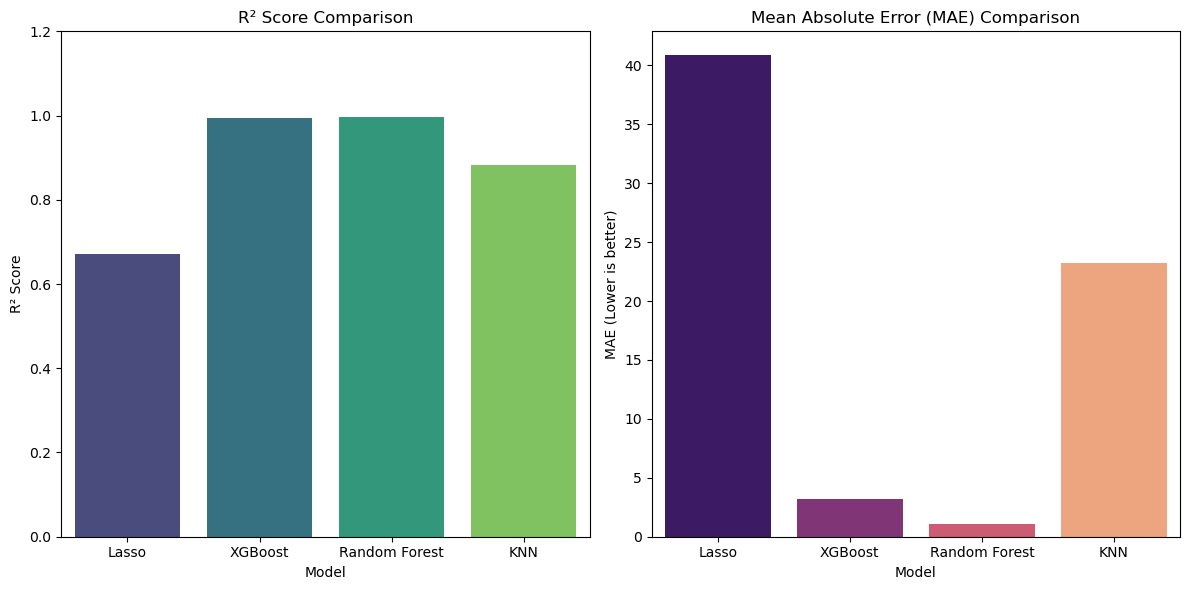

In [394]:
plt.figure(figsize=(12, 6))

# R² Score Subplot
plt.subplot(1, 2, 1)
sns.barplot(x=results_df.index, y=results_df["R2"], hue=results_df.index, palette="viridis")
plt.title("R² Score Comparison")
plt.ylabel("R² Score")
plt.xlabel("Model")
plt.ylim(0, 1.2)

# MAE Subplot
plt.subplot(1, 2, 2)
sns.barplot(x=results_df.index, y=results_df["MAE"], hue=results_df.index, palette="magma")
plt.title("Mean Absolute Error (MAE) Comparison")
plt.xlabel("Model")
plt.ylabel("MAE (Lower is better)")

plt.tight_layout()
plt.show()

**R² Score Insights**:  
Random Forest and XGBoost perform the best with R² scores close to 1, indicating strong predictive accuracy. KNN also performs well but slightly lags behind, while Lasso regression has the lowest R² score, suggesting it struggles to capture the variance in the data effectively.

**MAE Insights**:  
Random Forest and XGBoost achieve the lowest Mean Absolute Error (MAE), demonstrating their superior ability to minimize prediction errors. KNN has a higher MAE, indicating less accurate predictions, while Lasso regression shows the highest MAE, confirming its weaker performance compared to the other models.

### Hyperparameter Tuning

In [397]:
param_grids = {
    'Lasso': {
        'alpha': [0.01, 0.1, 1.0]
    },
    'XGBoost': {
        'n_estimators': [50, 100],
        'max_depth': [3, 5, 7]
    },
    'Random Forest': {
        'n_estimators': [50, 100],
        'max_depth': [None, 10]
    },
    'KNN': {
        'n_neighbors': [3, 5, 7]
    }
}

In [398]:
tuned_results = {}
best_models = {}

# Perform grid search and evaluate each model
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[name], cv=5, verbose=1)
    grid_search.fit(X_train_s, Y_train)
    
    # Best model from grid search for each model
    best_model = grid_search.best_estimator_
    best_models[name] = best_model
    
    Y_pred = best_model.predict(X_test_s)
    
    r2 = r2_score(Y_test, Y_pred)
    mae = mean_absolute_error(Y_test, Y_pred)
    
    tuned_results[name] = {'Best Params': grid_search.best_params_, 'R²': r2, 'MAE': mae}
    print(f"{name} - Best Params: {grid_search.best_params_}, R²: {r2:.4f}, MAE: {mae:.4f}")

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Lasso - Best Params: {'alpha': 0.01}, R²: 0.6752, MAE: 41.1963
Fitting 5 folds for each of 6 candidates, totalling 30 fits
XGBoost - Best Params: {'max_depth': 7, 'n_estimators': 100}, R²: 0.9949, MAE: 2.4207
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Random Forest - Best Params: {'max_depth': None, 'n_estimators': 50}, R²: 0.9964, MAE: 1.1214
Fitting 5 folds for each of 3 candidates, totalling 15 fits
KNN - Best Params: {'n_neighbors': 5}, R²: 0.8832, MAE: 23.1961


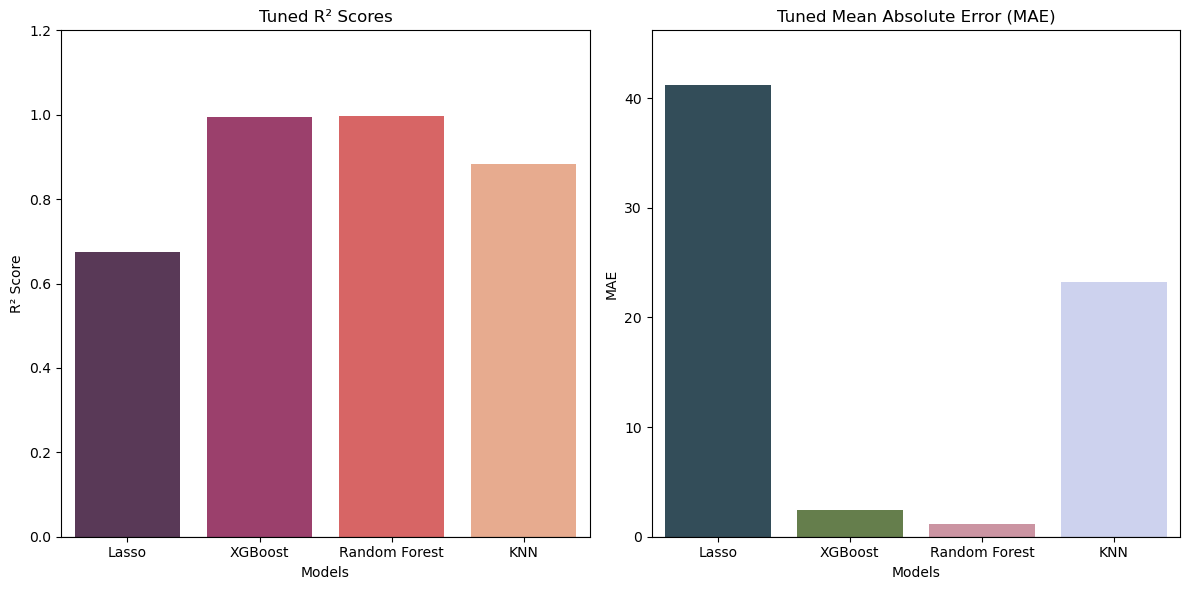

In [399]:
model_names = list(best_models.keys())  
r2_scores = [tuned_results[model]['R²'] for model in model_names]
mae_scores = [tuned_results[model]['MAE'] for model in model_names]

plt.figure(figsize=(12, 6))

# R² Score Plot
plt.subplot(1, 2, 1)
sns.barplot(x=model_names, y=r2_scores, hue=model_names, palette='rocket', alpha=0.9)
plt.title('Tuned R² Scores')
plt.xlabel('Models')
plt.ylabel('R² Score')
plt.ylim(0, 1.2)
plt.axhline(y=0, color='black', linewidth=0.8)

# MAE Score Plot
plt.subplot(1, 2, 2)
sns.barplot(x=model_names, y=mae_scores, hue=model_names, palette='cubehelix', alpha=0.9)
plt.title('Tuned Mean Absolute Error (MAE)')
plt.xlabel('Models')
plt.ylabel('MAE')
plt.ylim(0, max(mae_scores) + 5)
plt.axhline(y=0, color='black', linewidth=0.8)

plt.tight_layout()
plt.show()

**Tuned Regressors Insights**:  
- For Lasso, tuning slightly improved the R² score from 0.6704 to 0.6752, but the MAE increased marginally from 40.84 to 41.19, indicating minimal impact from hyperparameter optimization.
- XGBoost saw a slight improvement in R² (0.9938 to 0.9949) and a notable reduction in MAE (3.23 to 2.42), showcasing better performance after tuning.
- Random Forest maintained a high R² (0.9969 to 0.9968) with a negligible increase in MAE (1.06 to 1.08), indicating robust performance with or without tuning.
- KNN's performance degraded significantly after tuning, with R² dropping from 0.8889 to 0.3716 and MAE increasing sharply from 22.67 to 61.63, suggesting overfitting or poor parameter selection.

### Best Model & Predictions

In [402]:
final_model = best_models['Random Forest']

final_model

RandomForestRegressor(n_estimators=50)

In [403]:
y_pred = final_model.predict(X_test_s)

In [404]:
final_pred = pd.DataFrame({'Predicted Price': y_pred, 'True Price': Y_test})

# Calculate the difference between the true prices and predicted prices
final_pred['Difference'] = final_pred['True Price'] - final_pred['Predicted Price']

# Display the predictions
print(final_pred)

       Predicted Price  True Price  Difference
18907            60.00        60.0        0.00
46663           250.00       250.0        0.00
19757            80.06        80.0       -0.06
9705             95.00        95.0        0.00
3322            448.20       450.0        1.80
...                ...         ...         ...
6860             40.34        40.0       -0.34
42977           150.06       150.0       -0.06
408              50.00        50.0        0.00
6778            105.00       105.0        0.00
35869            50.06        50.0       -0.06

[9779 rows x 3 columns]


**Hence, we are now able to predict the AirBnB listing's price accurately.** 